In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
from importlib import reload

import scipy.stats as stats

import wrangle_zillow as wz

In [2]:
zillow = wz.wrangle_zillow_2()

In [3]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71945 entries, 0 to 77578
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      71945 non-null  int64  
 1   logerror                      71945 non-null  float64
 2   transactiondate               71945 non-null  object 
 3   bathroomcnt                   71945 non-null  float64
 4   bedroomcnt                    71945 non-null  float64
 5   buildingqualitytypeid         44951 non-null  float64
 6   calculatedbathnbr             71841 non-null  float64
 7   calculatedfinishedsquarefeet  71923 non-null  float64
 8   finishedsquarefeet12          71705 non-null  float64
 9   fips                          71945 non-null  float64
 10  fullbathcnt                   71841 non-null  float64
 11  latitude                      71945 non-null  float64
 12  longitude                     71945 non-null  float64
 13  l

In [4]:
zillow['county'] = zillow.fips.replace({6037:'LA', 6059:'Orange', 6111:'Ventura'})
zillow.drop(columns='fips', inplace=True)


In [5]:
train, test, split = wz.split_data(zillow)

## 1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. 

### 1. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

<AxesSubplot:xlabel='county', ylabel='logerror'>

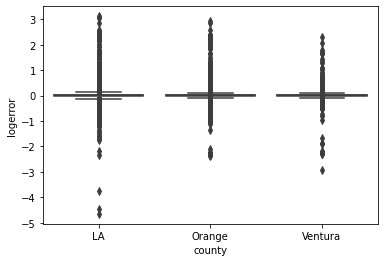

In [6]:
sns.boxplot(data=train, x='county', y='logerror')

In [7]:
la = train[train.county == 'LA'].logerror
orange = train[train.county == 'Orange'].logerror
ventura = train[train.county == 'Ventura'].logerror

In [8]:
stats.kruskal(la, orange, ventura)

KruskalResult(statistic=8.74144065100726, pvalue=0.012642130838150889)

**p < alpha (0.05) so we can say there is a difference in the means of the logerrors of the three different counties.**

### 2. What variables have a strong correlation with ```logerror```?

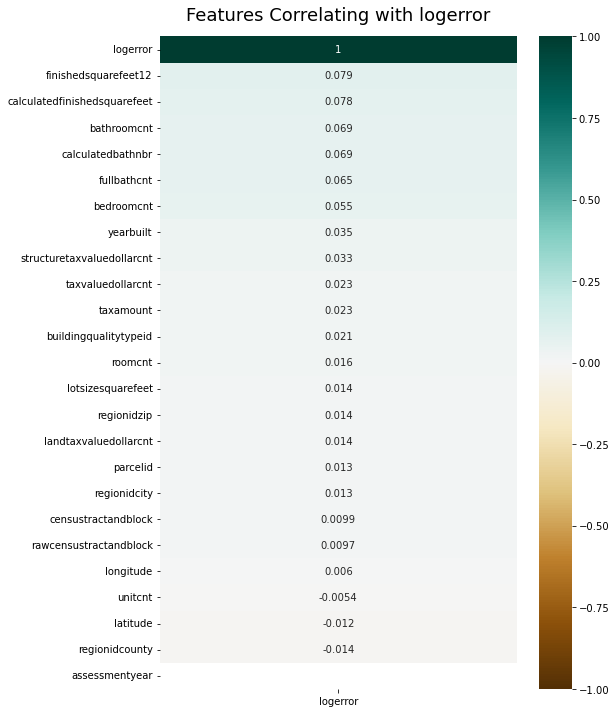

In [9]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train.corr(method='spearman')[['logerror']].sort_values(by='logerror', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with logerror', fontdict={'fontsize':18}, pad=16);

```finishedsquarefeet12```, ```calculatedfinishedsquarefeet```, ```bathroomcnt``` and ```calculatedbathnbr``` have the strongest correlation with logerror

### 3. Which county has the most houses in our data?

In [10]:
list(train.county.unique())

['LA', 'Orange', 'Ventura']

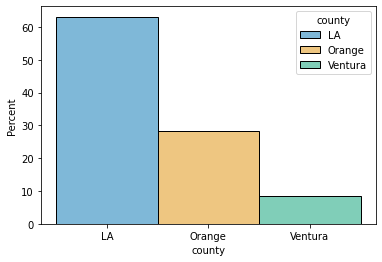

In [11]:
sns.histplot(train, x='county',stat='percent', hue='county', palette='colorblind');

**LA county represents over 60% of our data!**

### 4. Is there a difference in size of houses between the counties?

<AxesSubplot:xlabel='county', ylabel='calculatedfinishedsquarefeet'>

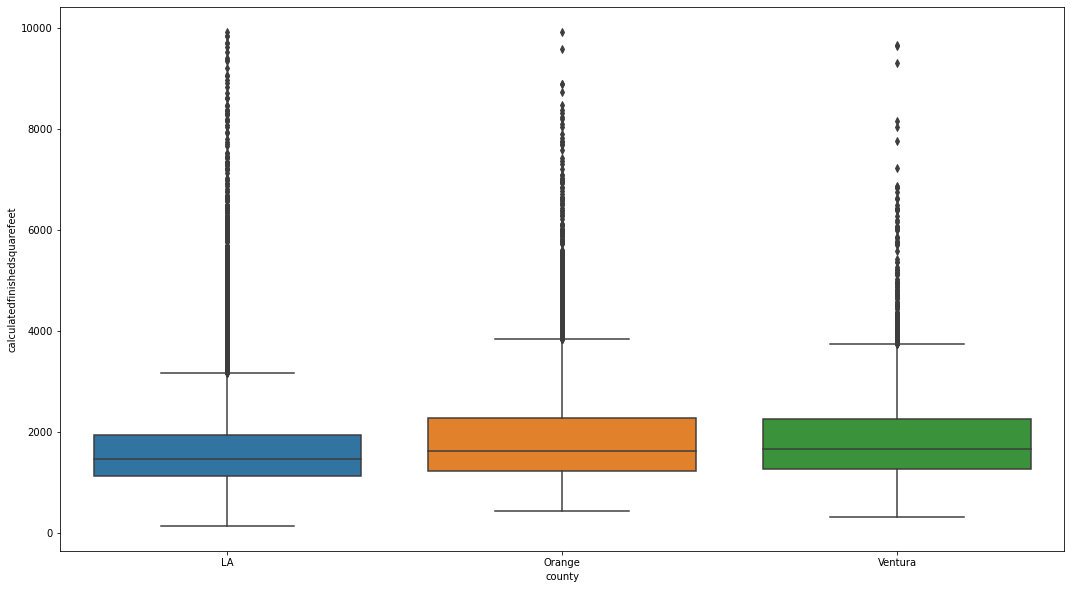

In [12]:
plt.figure(figsize=(18, 10))
sns.boxplot(data=train, x='county', y=train[train.calculatedfinishedsquarefeet <=10000].calculatedfinishedsquarefeet)

**Seems like Orange county homes are the biggest**

### 5. What other features might have connection with each other?

In [13]:
pd.options.display.float_format = '{:,.3f}'.format

In [14]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
parcelid,"46,764.000","13,052,014.374","3,054,496.965","10,711,888.000","11,542,549.750","12,592,236.500","14,266,261.000","167,688,532.000"
logerror,"46,764.000",0.017,0.168,-4.655,-0.024,0.007,0.038,3.124
bathroomcnt,"46,764.000",2.263,0.948,0.000,2.000,2.000,3.000,18.000
bedroomcnt,"46,764.000",3.003,1.026,0.000,2.000,3.000,4.000,14.000
buildingqualitytypeid,"29,141.000",6.588,1.695,1.000,6.000,6.000,8.000,12.000
calculatedbathnbr,"46,688.000",2.266,0.945,1.000,2.000,2.000,3.000,18.000
calculatedfinishedsquarefeet,"46,749.000","1,751.049",935.336,128.000,"1,163.000","1,508.000","2,062.000","21,929.000"
finishedsquarefeet12,"46,594.000","1,752.643",935.552,128.000,"1,164.000","1,510.000","2,064.000","21,929.000"
fullbathcnt,"46,688.000",2.195,0.926,1.000,2.000,2.000,3.000,18.000
latitude,"46,764.000","34,005,769.193","269,503.424","33,339,600.000","33,803,997.750","34,019,103.000","34,177,258.500","34,818,767.000"


In [15]:
train['sqft_bin'] = pd.cut(train.calculatedfinishedsquarefeet, [0, 500, 1500, 2500, 10000, 21929])

<AxesSubplot:xlabel='bathroomcnt', ylabel='logerror'>

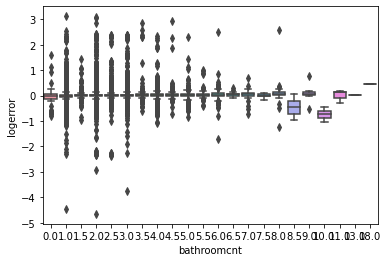

In [16]:
sns.boxplot(x=train.bathroomcnt, y=train.logerror)

In [17]:
train_split = train[['bathroomcnt' , 'calculatedbathnbr', 'county', 'logerror', 'fullbathcnt', 'sqft_bin']]

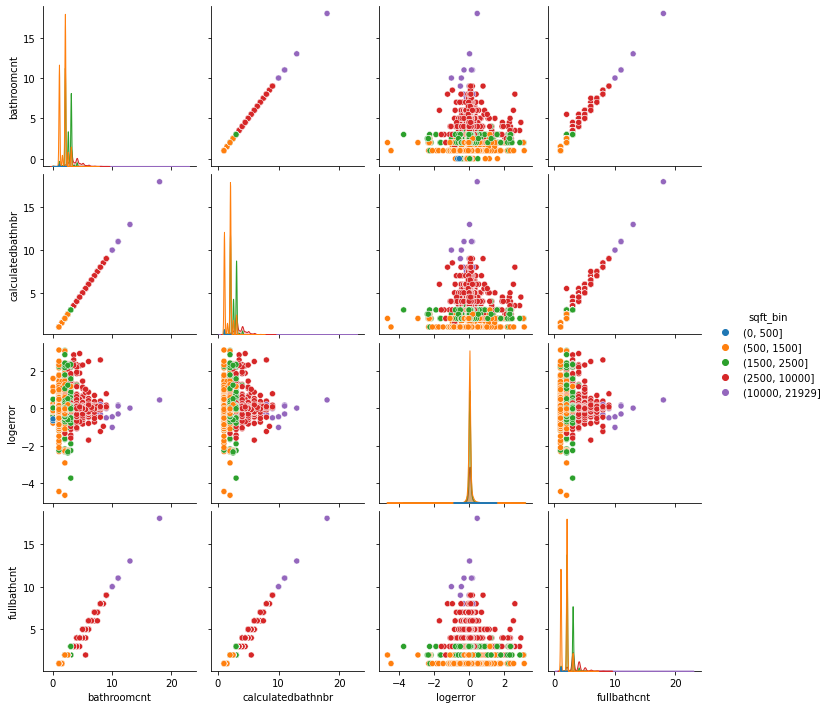

In [25]:
sns.pairplot(train_split, hue='sqft_bin')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

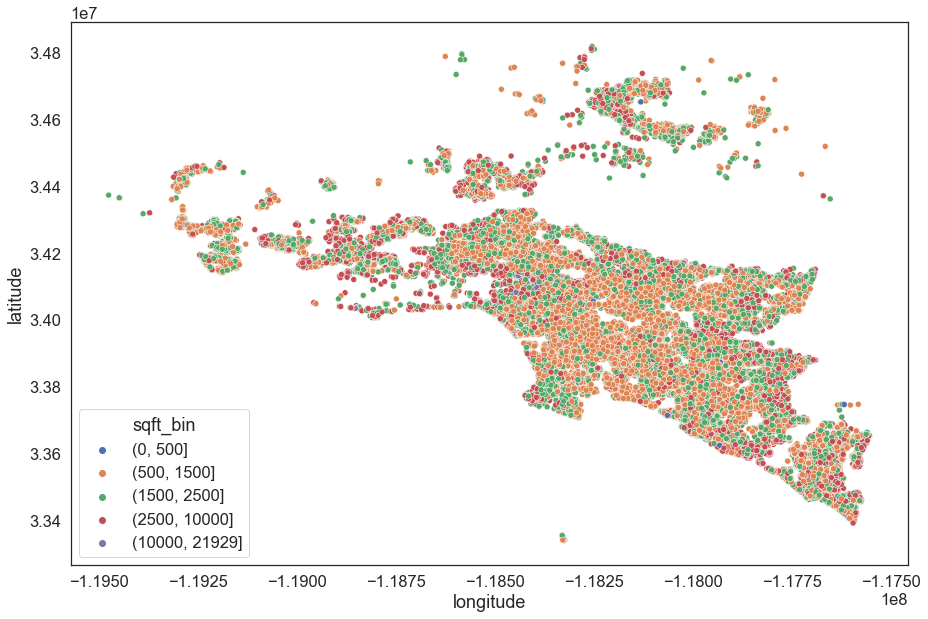

In [62]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
sns.scatterplot(data =train, x='longitude', y= 'latitude', hue='sqft_bin')

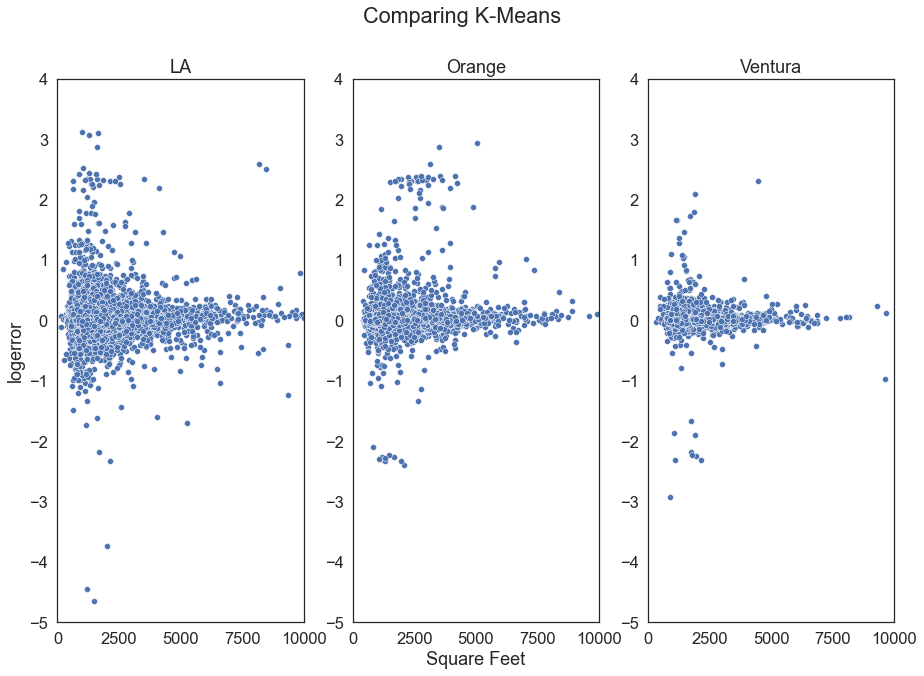

In [53]:
sns.set(font_scale=1.5)
sns.set_style('white')

fig, ax = plt.subplots(1,3, figsize=(15,10))

fig.suptitle("Comparing K-Means")


sns.scatterplot(data=train[train.county=='LA'], x='calculatedfinishedsquarefeet', y= 'logerror', ax=ax[0])
ax[0].set_title('LA')
ax[0].set_ylim([-5,4])
ax[0].set_xlabel('')
ax[0].set_xlim([0,10000])

sns.scatterplot(data=train[train.county=='Orange'], x='calculatedfinishedsquarefeet', y= 'logerror', ax=ax[1])
ax[1].set_title('Orange')
ax[1].set_ylabel('')
ax[1].set_ylim([-5,4])
ax[1].set_ylabel('')
ax[1].set_xlabel('Square Feet')
ax[1].set_xlim([0,10000])

sns.scatterplot(data=train[train.county=='Ventura'], x='calculatedfinishedsquarefeet', y= 'logerror', ax=ax[2])
ax[2].set_title('Ventura')
ax[2].set_ylabel('')
ax[2].set_ylim([-5,4])
ax[2].set_xlabel('')
ax[2].set_xlim([0,10000])

plt.show()

<AxesSubplot:xlabel='calculatedfinishedsquarefeet', ylabel='logerror'>

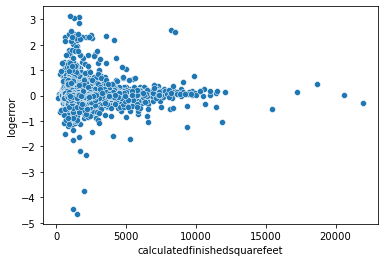